# 不同waitnum对prob的影响

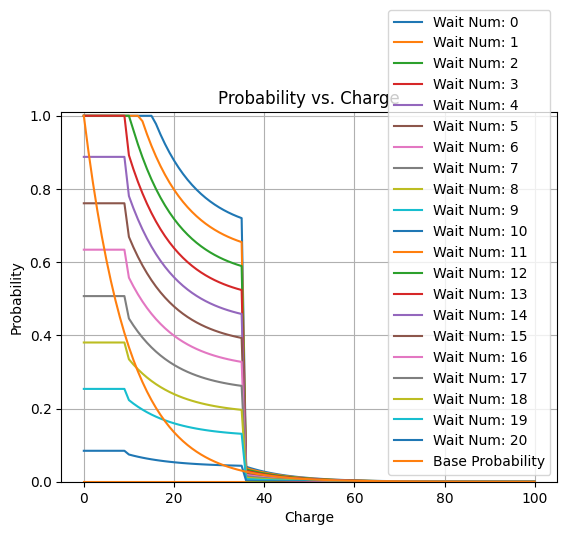

In [5]:
import math
import matplotlib.pyplot as plt


def get_base_probability(charge):
    scale = 10  # 假设的scale值
    return math.exp(-charge / scale)
# distance_to_next_station, distance_to_end, remaining_range
def get_charging_probability(charge, waitnum):
    current_num = 10
    waiting_num = waitnum

    base_probability = math.exp(-charge / scale)
    if 10 <= charge <= 35:
        base_probability += 0.45
    elif 0 <= charge < 10:
        base_probability = 0.93

    if waiting_num < current_num:
        adjusted_probability = min(base_probability * (1 - waiting_num / (current_num + 1)) * 1.5, 1)
    elif waiting_num > 2 * current_num:
        adjusted_probability = max(base_probability * (1 - waiting_num / (current_num + 1)) * 0.5, 0)
    else:
        adjusted_probability = base_probability * (1 - waiting_num / (current_num + 1))
    return adjusted_probability

wait_nums = range(0, 21)  # waitnum范围从0到20
charges = range(0, 101)  # charge范围从0到100
base_probabilities = [get_base_probability(charge) for charge in charges]

for wait_num in wait_nums:
    adjusted_probabilities = [get_charging_probability(charge, wait_num) for charge in charges]
    plt.plot(charges, adjusted_probabilities, label=f'Wait Num: {wait_num}')
plt.plot(charges, base_probabilities, label='Base Probability')
plt.xlabel('Charge')
plt.ylabel('Probability')
plt.title('Probability vs. Charge')
plt.legend()
plt.grid(True)
plt.ylim(0,1.01)

plt.show()

# 引入电量越低，排队的影响越小

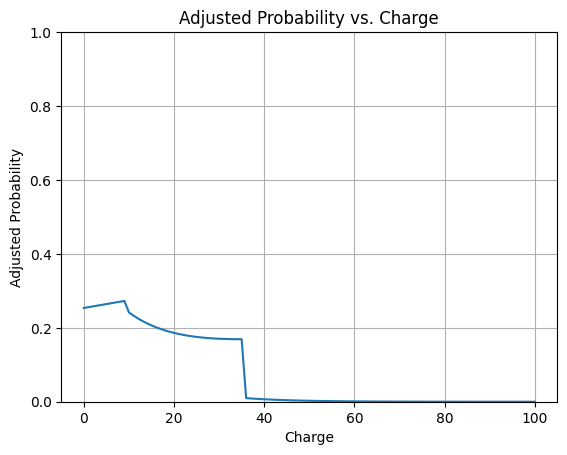

In [9]:
import matplotlib.pyplot as plt
import math

def get_charging_probability(charge, distance_to_next_station, remaining_distance, remaining_range, queue_size):
    current_num = 10
    waiting_num = queue_size

    base_probability = math.exp(-charge / scale)
    if 10 <= charge <= 35:
        base_probability += 0.45
    elif 0 <= charge < 10:
        base_probability = 0.93

    # 根据距离和剩余电量进行调整
    distance_ratio = remaining_distance / remaining_range
    if distance_ratio > 1.5:
        base_probability *= 0.5

    # 根据电量进行调整
    charge_adjustment = 1 - charge / 100

    # 根据排队车辆数量进行调整
    queue_adjustment = 1 - (waiting_num / (current_num + 1)) * charge_adjustment

    adjusted_probability = base_probability * queue_adjustment

    # 确保概率在0-1范围内
    adjusted_probability = max(min(adjusted_probability, 1), 0)

    return adjusted_probability

charges = range(0, 101)  # charge范围从0到100
distance_to_next_station = 50  # 下一个充电站的距离
remaining_distance = 200  # 到终点的剩余距离
remaining_range = 80  # 当前电量还能行驶的距离
queue_size = 5  # 排队车辆数量

adjusted_probabilities = [get_charging_probability(charge, distance_to_next_station, remaining_distance, remaining_range, queue_size) for charge in charges]

plt.plot(charges, adjusted_probabilities)
plt.xlabel('Charge')
plt.ylabel('Adjusted Probability')
plt.title('Adjusted Probability vs. Charge')
plt.ylim(0, 1)  # 设置y轴范围为0到1
plt.grid(True)
plt.show()

# 引入剩余距离和剩余电量 （离终点越近，概率越低）

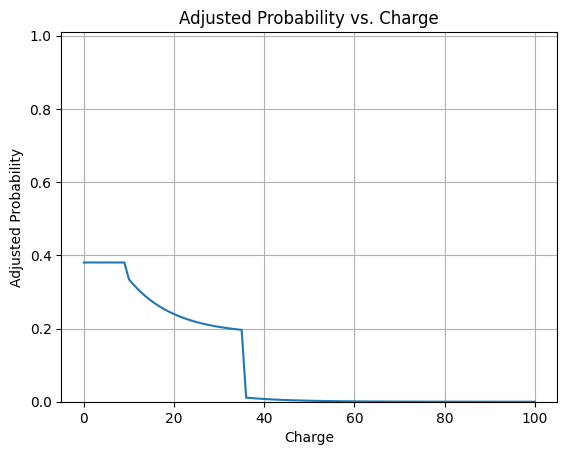

In [6]:

def get_charging_probability(charge, distance_to_next_station, remaining_distance, remaining_range):
    current_num = 10
    waiting_num = 5

    base_probability = math.exp(-charge / scale)
    if 10 <= charge <= 35:
        base_probability += 0.45
    elif 0 <= charge < 10:
        base_probability = 0.93

    if waiting_num < current_num:
        adjusted_probability = min(base_probability * (1 - waiting_num / (current_num + 1)) * 1.5, 1)
    elif waiting_num > 2 * current_num:
        adjusted_probability = max(base_probability * (1 - waiting_num / (current_num + 1)) * 0.5, 0)
    else:
        adjusted_probability = base_probability * (1 - waiting_num / (current_num + 1))

   # 根据距离和剩余电量进行调整
    distance_ratio = remaining_distance / remaining_range
    if distance_ratio > 1.5:
        adjusted_probability *= 0.5

    # 确保概率在0-1范围内
    adjusted_probability = max(min(adjusted_probability, 1), 0)

    return adjusted_probability

charges = range(0, 101)  # charge范围从0到100
distance_to_next_station = 50  # 下一个充电站的距离
remaining_distance = 200  # 到终点的剩余距离
remaining_range = 80  # 当前电量还能行驶的距离

adjusted_probabilities = [get_charging_probability(charge, distance_to_next_station, remaining_distance, remaining_range) for charge in charges]

plt.plot(charges, adjusted_probabilities)
plt.xlabel('Charge')
plt.ylabel('Adjusted Probability')
plt.title('Adjusted Probability vs. Charge')
plt.ylim(0,1.01)
plt.grid(True)
plt.show()

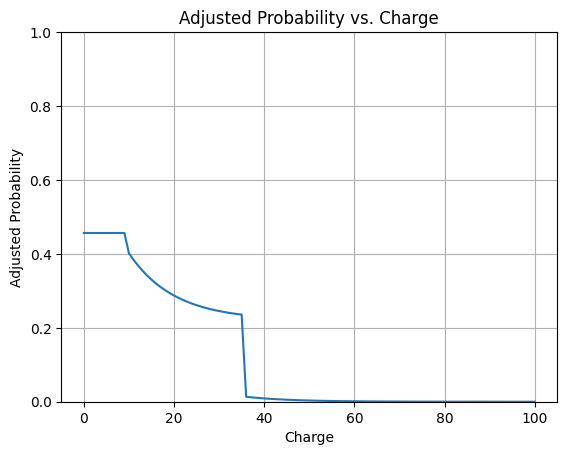

In [7]:
import matplotlib.pyplot as plt
import math

def get_charging_probability(charge, distance_to_next_station, remaining_distance, remaining_range):
    current_num = 10
    waiting_num = 5

    base_probability = math.exp(-charge / scale)
    if 10 <= charge <= 35:
        base_probability += 0.45
    elif 0 <= charge < 10:
        base_probability = 0.93

    # 根据距离和剩余电量进行调整
    distance_ratio = remaining_distance / remaining_range
    if distance_ratio > 1.5:
        base_probability *= 0.5

    # 根据距离到下一个充电站进行调整
    if distance_to_next_station < remaining_distance and remaining_range > distance_to_next_station:
        base_probability *= 1.2
    elif distance_to_next_station > remaining_distance and remaining_range < distance_to_next_station:
        base_probability *= 0.8

    # 确保概率在0-1范围内
    base_probability = max(min(base_probability, 1), 0)

    if waiting_num < current_num:
        adjusted_probability = min(base_probability * (1 - waiting_num / (current_num + 1)) * 1.5, 1)
    elif waiting_num > 2 * current_num:
        adjusted_probability = max(base_probability * (1 - waiting_num / (current_num + 1)) * 0.5, 0)
    else:
        adjusted_probability = base_probability * (1 - waiting_num / (current_num + 1))

    return adjusted_probability

charges = range(0, 101)  # charge范围从0到100
distance_to_next_station = 50  # 下一个充电站的距离
remaining_distance = 200  # 到终点的剩余距离
remaining_range = 80  # 当前电量还能行驶的距离

adjusted_probabilities = [get_charging_probability(charge, distance_to_next_station, remaining_distance, remaining_range) for charge in charges]

plt.plot(charges, adjusted_probabilities)
plt.xlabel('Charge')
plt.ylabel('Adjusted Probability')
plt.title('Adjusted Probability vs. Charge')
plt.ylim(0, 1)  # 设置y轴范围为0到1
plt.grid(True)
plt.show()

# test baseprob在10-36上调0.45的prob

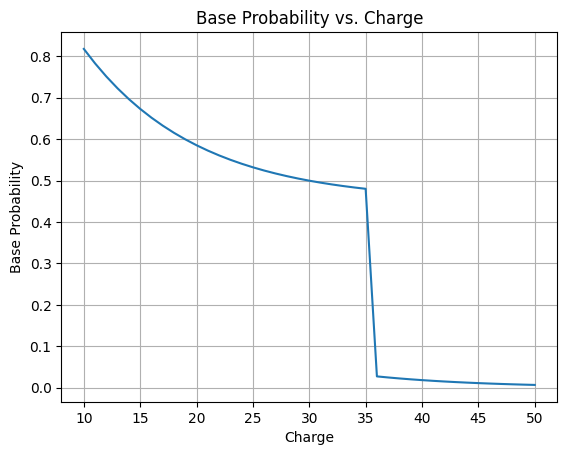

In [8]:
import matplotlib.pyplot as plt
import math

# 定义charge范围和步长
charge_range = range(10, 51)
scale = 10  # 假设的scale值

# 计算base_probability
base_probabilities = [math.exp(-charge / scale) for charge in charge_range]

# 在charge的区间[10, 35]上增加0.45
for i in range(10, 36):
    base_probabilities[i - 10] += 0.45

# 绘制图表
plt.plot(charge_range, base_probabilities)
plt.xlabel('Charge')
plt.ylabel('Base Probability')
plt.title('Base Probability vs. Charge')
plt.grid(True)
plt.show()